# Data visualization of Rafael Nadal - Roger Federer rivalry (2004-2018)

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Get the file and the data as a dataframe

In [141]:
data = pd.read_csv('rafa-roger.txt', sep="\t", header=None)
data.columns = ["No.","Year","Tournament","Series","Surface","Round","Winner","Score","Length","Sets","Federer","Nadal"]

In [142]:
print data.head()
del data['Series']
del data['Score']
del data['Sets']
del data['Length']
del data['Federer']
del data['Nadal']
del data['No.']

   No.  Year                                Tournament   Series Surface  \
0  1.0  2004                  United States Miami Open  Masters    Hard   
1  2.0  2005                  United States Miami Open  Masters    Hard   
2  3.0  2005                      France Roland Garros    Major    Clay   
3  4.0  2006  United Arab Emirates Dubai Championships      500    Hard   
4  5.0  2006                Monaco Monte-Carlo Masters  Masters    Clay   

         Round   Winner                              Score Length Sets  \
0  Round of 32    Nadal                           6–3, 6–3   1:10  2/3   
1        Final  Federer  2–6, 6–7(4–7), 7–6(7–5), 6–3, 6–1   3:43  5/5   
2   Semifinals    Nadal                 6–3, 4–6, 6–4, 6–3   2:47  4/5   
3        Final    Nadal                      2–6, 6–4, 6–4   1:53  3/3   
4        Final    Nadal       6–2, 6–7(2–7), 6–3, 7–6(7–5)   3:50  4/5   

   Federer  Nadal  
0        0      1  
1        1      1  
2        1      2  
3        1      3  
4   

In [143]:
print data.head()

   Year                                Tournament Surface        Round  \
0  2004                  United States Miami Open    Hard  Round of 32   
1  2005                  United States Miami Open    Hard        Final   
2  2005                      France Roland Garros    Clay   Semifinals   
3  2006  United Arab Emirates Dubai Championships    Hard        Final   
4  2006                Monaco Monte-Carlo Masters    Clay        Final   

    Winner  
0    Nadal  
1  Federer  
2    Nadal  
3    Nadal  
4    Nadal  


In [144]:
countries = ["United States ", "France ", "United Arab Emirates ", "Monaco ", "United Kingdom ", "Italy ", "China ", "Germany ", "Australia ", "Spain ", "Switzerland "]
listToReplace = data['Tournament']
newList = []
for i in listToReplace:
    for j in countries:
        if j in i:
            newList.append(i.replace(j, ""))
            break
data['Tournament'] = newList

In [145]:
data['Tournament']

0                Miami Open
1                Miami Open
2             Roland Garros
3       Dubai Championships
4       Monte-Carlo Masters
5              Italian Open
6             Roland Garros
7                 Wimbledon
8        Tennis Masters Cup
9       Monte-Carlo Masters
10          Hamburg Masters
11            Roland Garros
12                Wimbledon
13       Tennis Masters Cup
14      Monte-Carlo Masters
15          Hamburg Masters
16            Roland Garros
17                Wimbledon
18          Australian Open
19              Madrid Open
20              Madrid Open
21    ATP World Tour Finals
22               Miami Open
23              Madrid Open
24            Roland Garros
25    ATP World Tour Finals
26          Australian Open
27     Indian Wells Masters
28     Indian Wells Masters
29             Italian Open
30       Cincinnati Masters
31    ATP World Tour Finals
32          Australian Open
33            Swiss Indoors
34          Australian Open
35     Indian Wells 

### Federer and Nadal wins over the years

In [146]:
years = [i for i in range(2004, 2019)]
fedWins = [0 for i in range(2004, 2019)]
rafaWins = [0 for i in range(2004, 2019)]

for index, row in data.iterrows():
    if row['Winner'] == "Nadal":
        rafaWins[row['Year'] - 2004] += 1
    elif row['Winner'] == "Federer":
        fedWins[row['Year'] - 2004] += 1
    

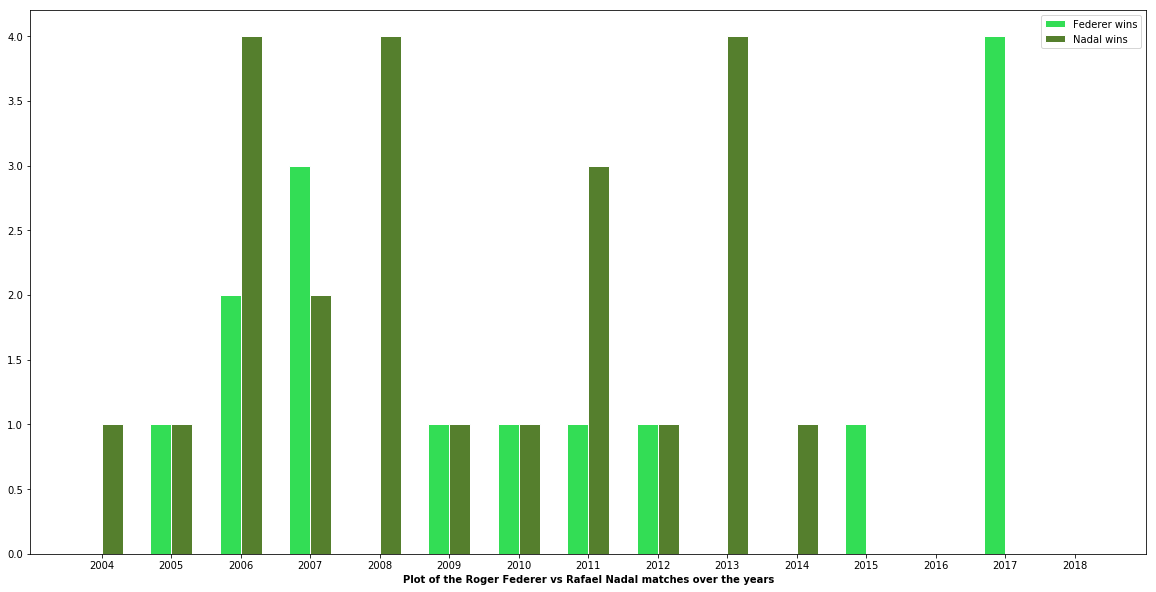

In [150]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(fedWins))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, fedWins, color='#33dd55', width=barWidth, edgecolor='white', label='Federer wins')
plt.bar(r2, rafaWins, color='#557f2d', width=barWidth, edgecolor='white', label='Nadal wins')
 
# Add xticks on the middle of the group bars
plt.xlabel('Plot of the Roger Federer vs Rafael Nadal matches over the years', fontweight='bold')
plt.xticks([r + barWidth-0.15 for r in range(len(fedWins))], [i for i in range(2004, 2019)])
 
# Create legend & Show graphic
plt.legend()



### The wins against each other on different surfaces

In [151]:
fedWins = [0, 0, 0]
rafaWins = [0, 0, 0]
surfaces = ['Hard', 'Clay', 'Grass']

for index, row in data.iterrows():
    if row['Winner'] == "Nadal":
        if row['Surface'] == "Hard" or row['Surface'] == "Hard (i)":
            rafaWins[0] += 1
        elif row['Surface'] == "Clay":
            rafaWins[1] += 1
        elif row['Surface'] == "Grass":
            rafaWins[2] += 1
    elif row['Winner'] == "Federer":
        if row['Surface'] == "Hard" or row['Surface'] == "Hard (i)":
            fedWins[0] += 1
        elif row['Surface'] == "Clay":
            fedWins[1] += 1
        elif row['Surface'] == "Grass":
            fedWins[2] += 1
            
print rafaWins
print fedWins

[9, 13, 1]
[11, 2, 2]


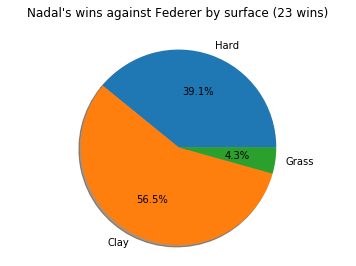

In [152]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = surfaces
rafasizes = rafaWins
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(rafasizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Nadal's wins against Federer by surface (23 wins)\n")
plt.show()

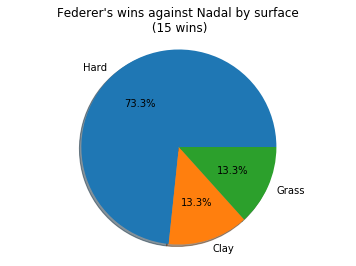

In [153]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = surfaces
fedsizes = fedWins
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(fedsizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Federer's wins against Nadal by surface\n (15 wins)")
plt.show()

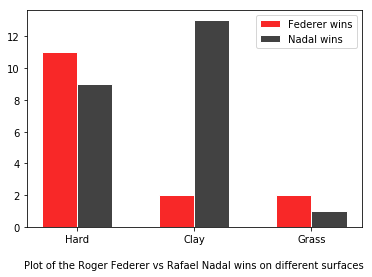

In [157]:
# plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.3

# Set position of bar on X axis
r1 = np.arange(len(fedWins))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, fedWins, color='#F82828', width=barWidth, edgecolor='white', label='Federer wins')
plt.bar(r2, rafaWins, color='#424242', width=barWidth, edgecolor='white', label='Nadal wins')
 
# Add xticks on the middle of the group bars
plt.xlabel('\nPlot of the Roger Federer vs Rafael Nadal wins on different surfaces')
plt.xticks([r + barWidth-0.15 for r in range(len(fedWins))], surfaces)
 
# Create legend & Show graphic
plt.legend()

## Comparing the slam finishes of Nadal and Federer over the years

In [274]:
RF = pd.read_csv('roger-slam-data.txt', sep="\t", header=None)
RF.columns = RF.iloc[0]

Nad = pd.read_csv('rafa-slam-data.txt', sep="\t", header=None)
Nad.columns = Nad.iloc[0]

In [275]:
RF = RF.drop([0], axis=0)
Nad = Nad.drop([0], axis=0)

In [276]:
RF = RF.drop(['1999', '2000', '2001', '2002'], axis=1)

In [277]:
Nad

,Tournament,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,SR,W–L,Win %
1,Australian Open,A,3R,4R,A,QF,SF,W,QF,QF,...,A,F,QF,1R,F,QF,NaN,1 / 13,55–12,82.1
2,French Open,A,A,W,W,W,W,4R,W,W,...,W,W,QF,3R,W,W,NaN,11 / 14,86–2,97.7
3,Wimbledon,3R,A,2R,F,F,W,A,W,F,...,1R,4R,2R,A,4R,SF,NaN,2 / 13,48–11,81.3
4,US Open,2R,2R,3R,QF,4R,SF,SF,W,F,...,W,A,3R,4R,W,SF,NaN,3 / 14,58–11,84.1
5,Win–Loss,3–2,3–2,13–3,17–2,20–3,24–2,15–2,25–1,23–3,...,14–1,16–2,11–4,5–2,23–2,21–3,0–0,17 / 54,247–36,87.28


In [278]:
years = [i for i in range(2003, 2019)]
rounds = ['A','1R','2R','3R','4R','QF','SF','F','W']
RF_AO = [0 for i in range(2003, 2019)]
RF_RG = [0 for i in range(2003, 2019)]
RF_WB = [0 for i in range(2003, 2019)]
RF_UO = [0 for i in range(2003, 2019)]

Nad_AO = [0 for i in range(2003, 2019)]
Nad_RG = [0 for i in range(2003, 2019)]
Nad_WB = [0 for i in range(2003, 2019)]
Nad_UO = [0 for i in range(2003, 2019)]

for i in years:
    RF_AO[i-2003] = rounds.index(RF.iloc[0][str(i)])
for i in years:
    RF_RG[i-2003] = rounds.index(RF.iloc[1][str(i)])
for i in years:
    RF_WB[i-2003] = rounds.index(RF.iloc[2][str(i)])
for i in years:
    RF_UO[i-2003] = rounds.index(RF.iloc[3][str(i)])
    
for i in years:
    Nad_AO[i-2003] = rounds.index(Nad.iloc[0][str(i)])
for i in years:
    Nad_RG[i-2003] = rounds.index(Nad.iloc[1][str(i)])
for i in years:
    Nad_WB[i-2003] = rounds.index(Nad.iloc[2][str(i)])
for i in years:
    Nad_UO[i-2003] = rounds.index(Nad.iloc[3][str(i)])

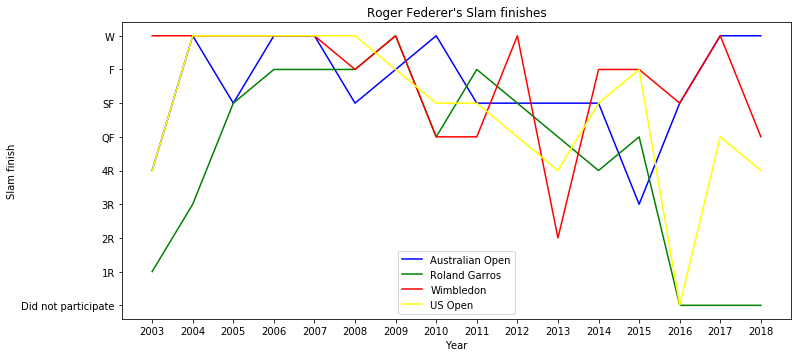

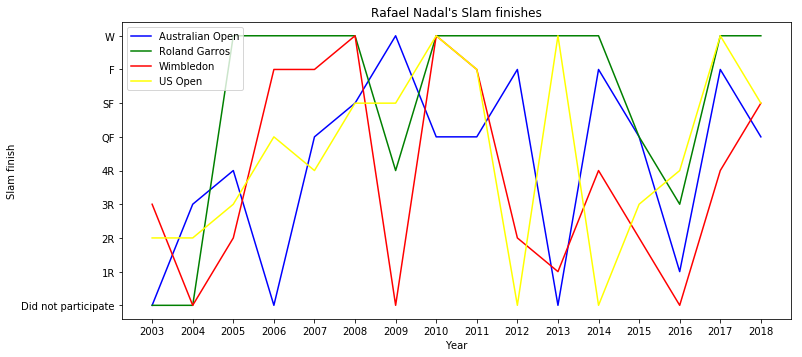

In [289]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.xticks(years)
plt.yticks(np.arange(9), ['Did not participate']+rounds[1:])
plt.xlabel('Year')
plt.ylabel('Slam finish')
plt.plot(years, RF_AO, color="blue")
plt.plot(years, RF_RG, color="green")
plt.plot(years, RF_WB, color="red")
plt.plot(years, RF_UO, color="yellow")
# plt.plot(years, Nad_AO, color='blue', linestyle=':')
# plt.plot(years, Nad_RG, color='green', linestyle=':')
# plt.plot(years, Nad_WB, color='red', linestyle=':')
# plt.plot(years, Nad_UO, color='yellow', linestyle=':')
plt.legend(['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'])
plt.title("Roger Federer's Slam finishes")
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
plt.xticks(years)
plt.yticks(np.arange(9), ['Did not participate']+rounds[1:])
plt.xlabel('Year')
plt.ylabel('Slam finish')
# plt.plot(years, RF_AO, color="blue")
# plt.plot(years, RF_RG, color="green")
# plt.plot(years, RF_WB, color="red")
# plt.plot(years, RF_UO, color="yellow")
plt.plot(years, Nad_AO, color='blue')
plt.plot(years, Nad_RG, color='green')
plt.plot(years, Nad_WB, color='red')
plt.plot(years, Nad_UO, color='yellow')
plt.legend(['Australian Open', 'Roland Garros', 'Wimbledon', 'US Open'])
plt.title("Rafael Nadal's Slam finishes")
plt.show()